# Data Mining Project

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as tkr
import seaborn as sns

In [2]:
sum_df = pd.read_csv('../data/sum_data.csv')

### Plot the data
Now we will plot the data to see if there are any correlations between the columns.

In [3]:
formatter = tkr.FuncFormatter(lambda x, pos: '{:,.1f}B'.format(x / 1e9) if abs(x) >= 1e9
else '{:,.0f}M'.format(x / 1e6) if abs(x) >= 1e6
else '{:,.0f}K'.format(x / 1e3) if abs(x) >= 1e3
else '{:,.0f}'.format(x))

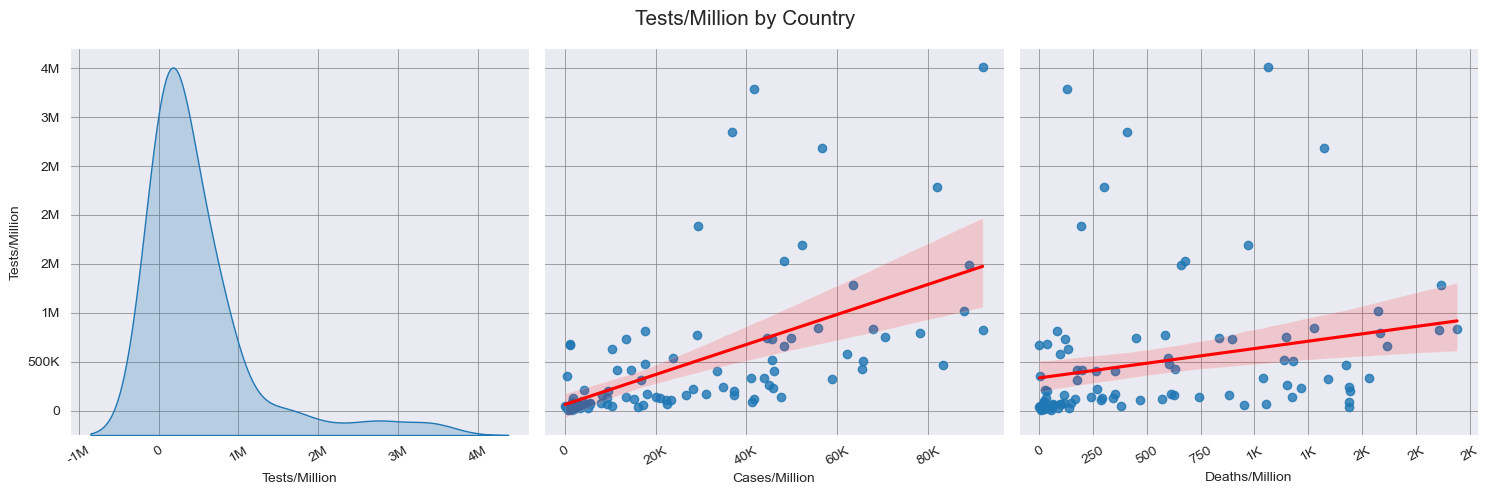

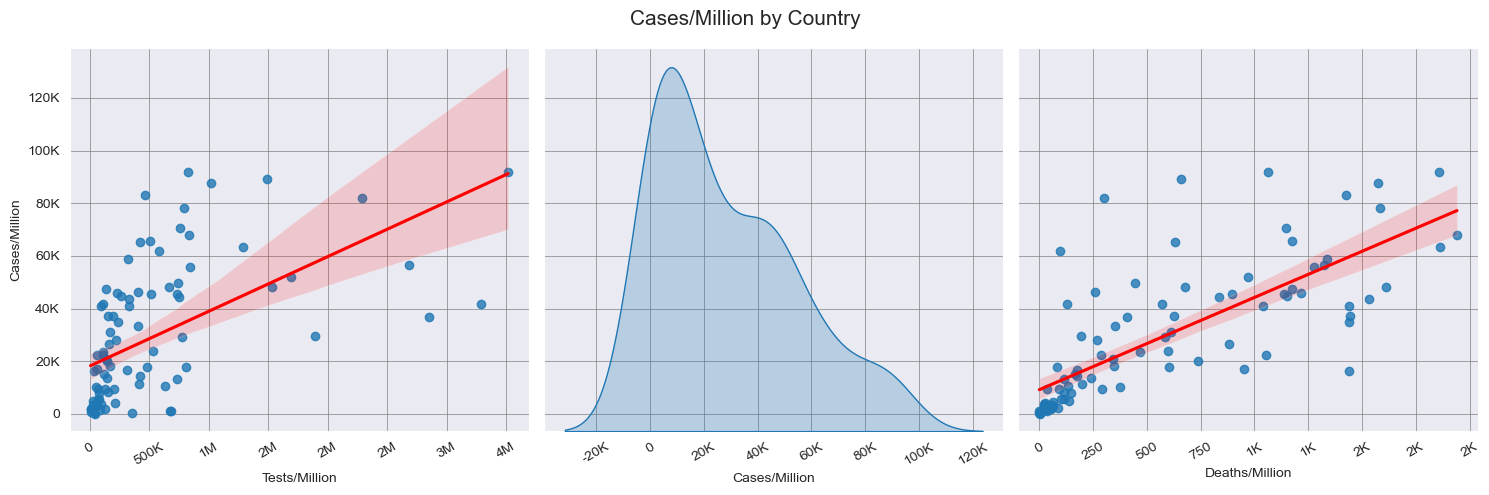

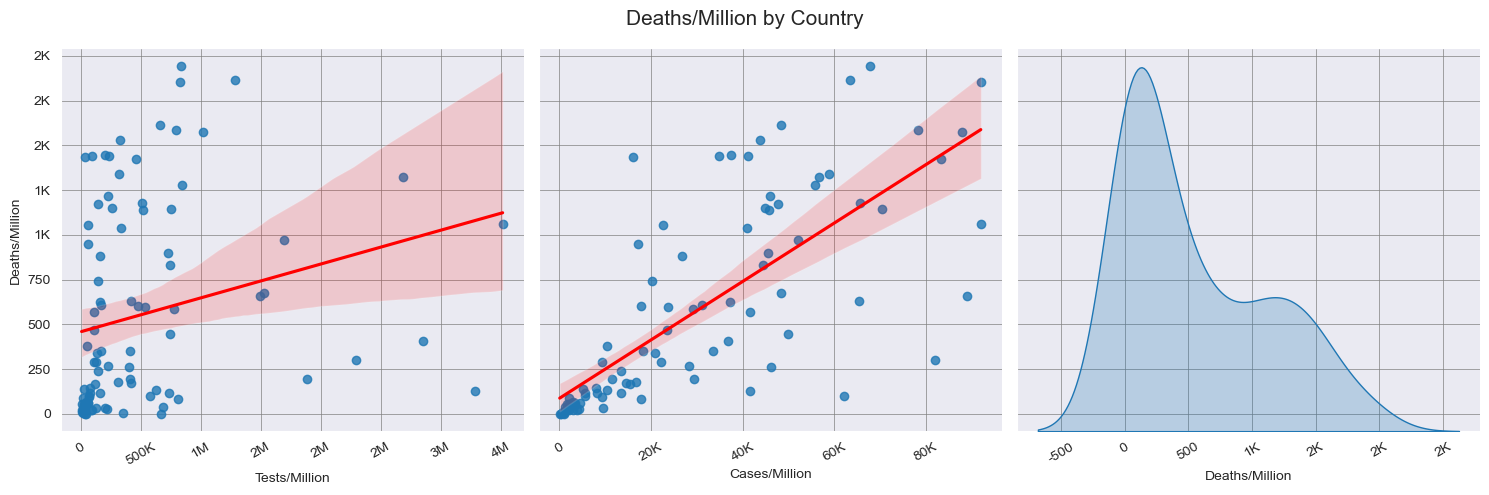

In [4]:
plots = {}
for val in ('Tests/Million', 'Cases/Million', 'Deaths/Million'):

    plots[val] = sns.pairplot(
        data=sum_df,
        y_vars=val,
        x_vars=('Tests/Million', 'Cases/Million', 'Deaths/Million'),
        diag_kind='kde',
        kind='reg',
        plot_kws={'line_kws': {'color': 'red'}},
        height=5
    )

    for axis in plots[val].axes.flat:
        axis.tick_params(axis='x', rotation=30)
        axis.xaxis.set_major_formatter(formatter)
        axis.yaxis.set_major_formatter(formatter)
        axis.grid(color='grey', linestyle='-', linewidth=0.5)

    plt.suptitle(val + ' by Country', fontsize=15)
    plt.subplots_adjust(top=0.9)
    plt.tight_layout()

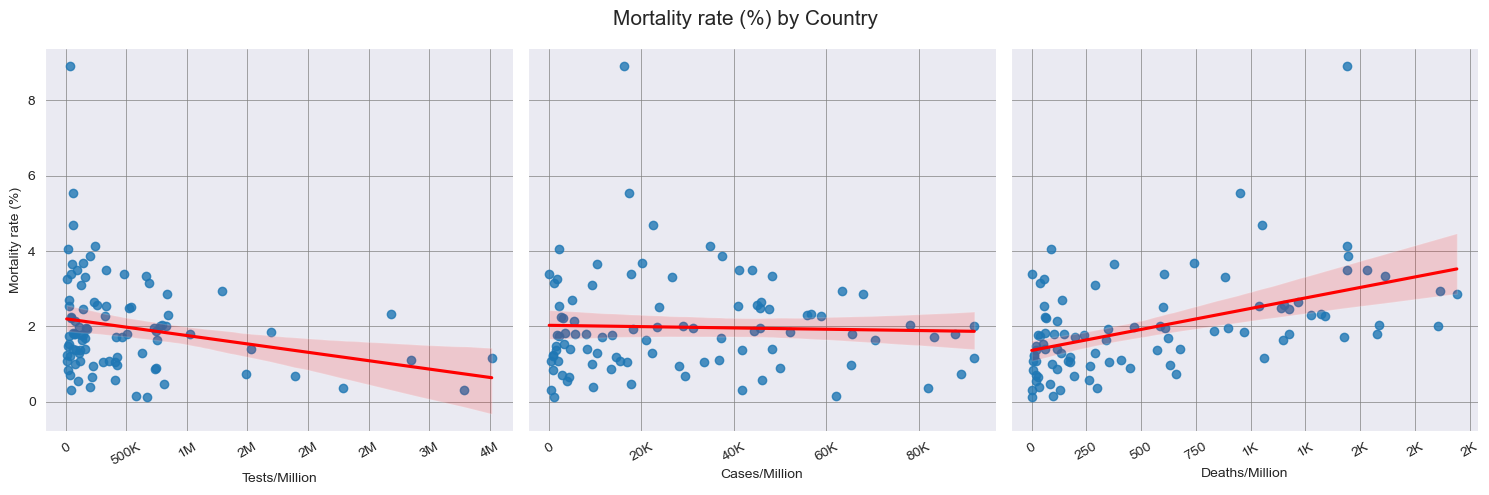

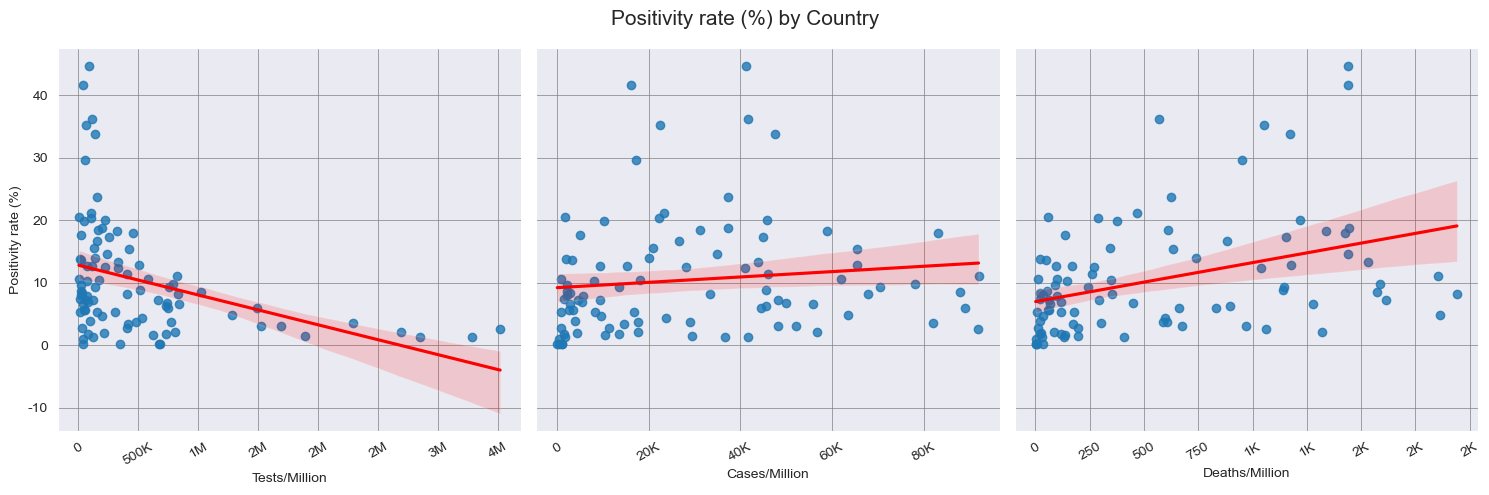

In [5]:
plots = {}
for val in ('Mortality rate (%)', 'Positivity rate (%)'):
    
    plots[val] = sns.pairplot(
        data=sum_df,
        y_vars=val,
        x_vars=('Tests/Million', 'Cases/Million', 'Deaths/Million'),
        diag_kind='kde',
        kind='reg',
        plot_kws={'line_kws': {'color': 'red'}},
        height=5
    )

    for axis in plots[val].axes.flat:
        axis.tick_params(axis='x', rotation=30)
        axis.xaxis.set_major_formatter(formatter)
        axis.yaxis.set_major_formatter(formatter)
        axis.grid(color='grey', linestyle='-', linewidth=0.5)

    plt.suptitle(val + ' by Country', fontsize=15)
    plt.subplots_adjust(top=0.9)
    plt.tight_layout()

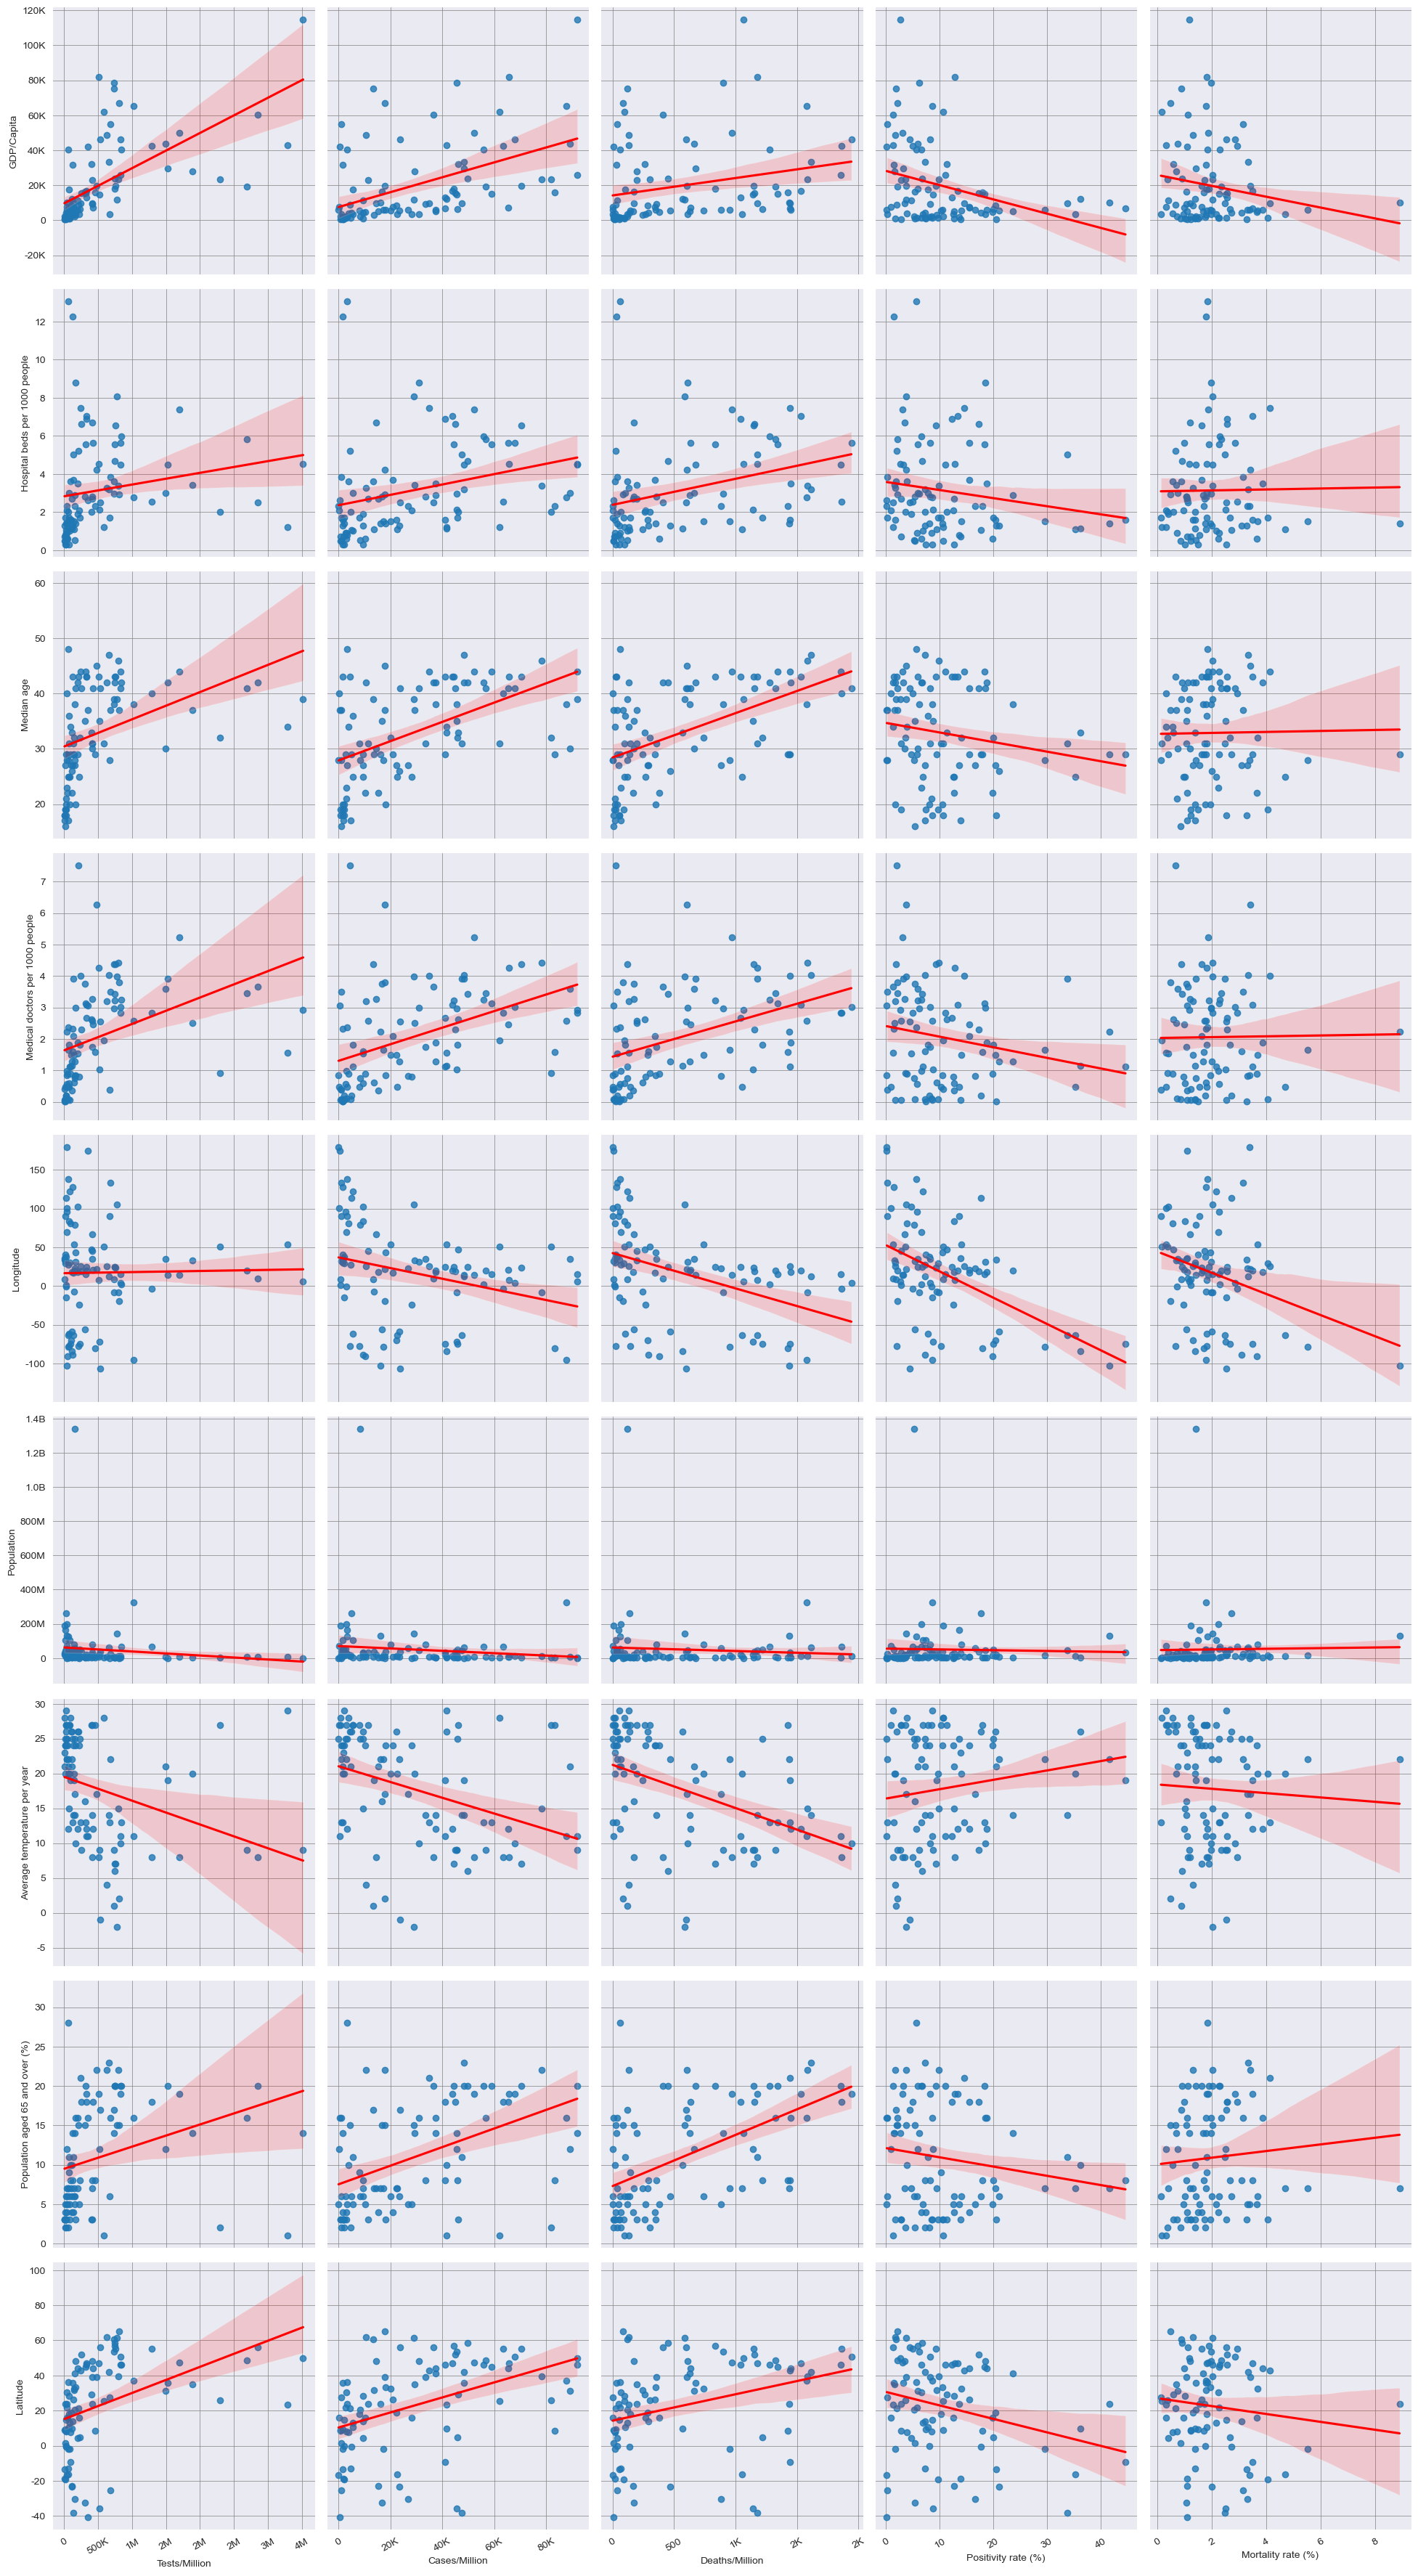

In [7]:
const_cols = {'Average temperature per year', 'GDP/Capita', 'Hospital beds per 1000 people', 'Latitude', 'Longitude', 'Median age', 'Medical doctors per 1000 people', 'Population', 'Population aged 65 and over (%)'}

plot = sns.pairplot(
    data=sum_df,
    # Add the mortality rate to the plot
    y_vars=const_cols,
    x_vars=['Tests/Million', 'Cases/Million', 'Deaths/Million', 'Positivity rate (%)', 'Mortality rate (%)'],
    kind='reg',
    plot_kws={'line_kws': {'color': 'red'}},
    height=4)

for axis in plot.axes.flat:
    axis.tick_params(axis='x', rotation=30)
    axis.xaxis.set_major_formatter(formatter)
    axis.yaxis.set_major_formatter(formatter)
    axis.grid(color='grey', linestyle='-', linewidth=0.5)

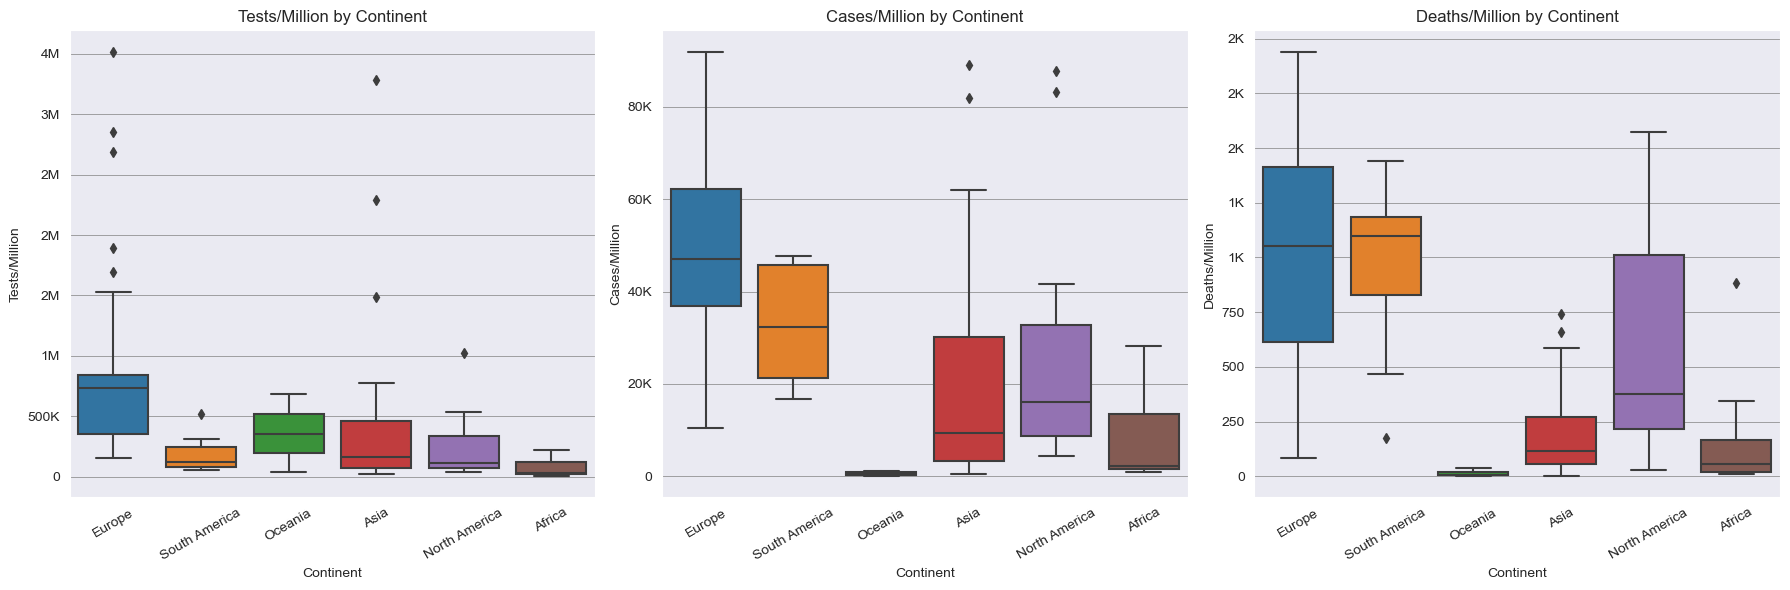

In [9]:
# Create a figure with three subplots.
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Loop through the variables and create box plots.
for i, column in enumerate(('Tests/Million', 'Cases/Million', 'Deaths/Million')):
    sns.boxplot(ax=axes[i], x='Continent', y=column, data=sum_df)
    axes[i].set_title(column + ' by Continent')
    axes[i].set_xlabel('Continent')
    axes[i].set_ylabel(column)
    axes[i].tick_params(axis='x', rotation=30)
    axes[i].grid(axis='y', color='grey', linestyle='-', linewidth=0.5)
    axes[i].yaxis.set_major_formatter(formatter)

# Adjust spacing between subplots.
plt.tight_layout()

# Show the plots.
plt.show()

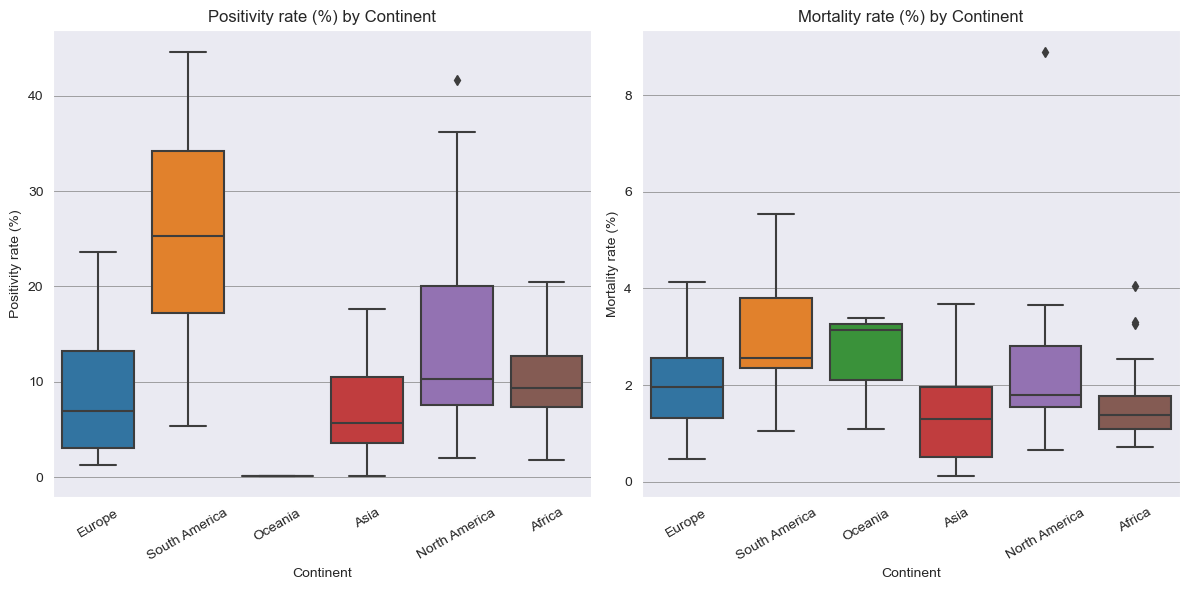

In [10]:
# Create a figure with three subplots.
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Loop through the variables and create box plots.
for i, column in enumerate(('Positivity rate (%)', 'Mortality rate (%)')):
    sns.boxplot(ax=axes[i], x='Continent', y=column, data=sum_df)
    axes[i].set_title(column + ' by Continent')
    axes[i].set_xlabel('Continent')
    axes[i].set_ylabel(column)
    axes[i].tick_params(axis='x', rotation=30)
    axes[i].grid(axis='y', color='grey', linestyle='-', linewidth=0.5)
    axes[i].yaxis.set_major_formatter(formatter)

# Adjust spacing between subplots.
plt.tight_layout()

# Show the plots.
plt.show()

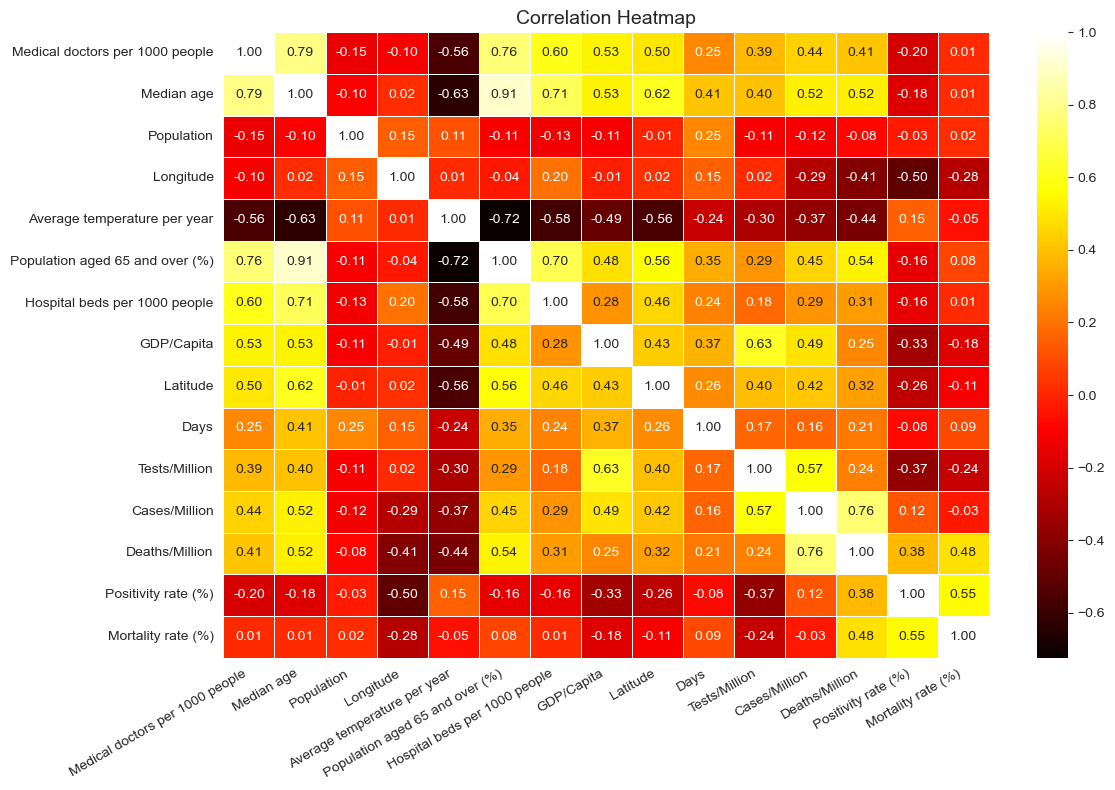

In [11]:
# Compute the correlation matrix
corr_matrix = sum_df.corr(numeric_only=True)

# Create a custom color map
cmap = sns.color_palette('hot', as_cmap=True)

# Create a heatmap
sns.heatmap(corr_matrix, annot=True, cmap=cmap, fmt=".2f", linewidths=0.5)

# Customize the plot
plt.title('Correlation Heatmap', fontsize=14)
plt.xticks(rotation=30, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.gcf().set_size_inches(12, 8)
plt.tight_layout()

# Show the plot
plt.show()

## Question 2 - Clustering

In [12]:
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score as sil
from sklearn.preprocessing import StandardScaler
import itertools

In [13]:
# Set the threshold for correlation with deaths and mortality
threshold = 0.4

# Select the columns with high correlation to deaths
sel_cols = [col for col in corr_matrix.columns if
            abs(corr_matrix['Deaths/Million'][col]) >= threshold and col != 'Deaths/Million']
# Get the correlation scores for the selected columns
corr_scores = np.abs(corr_matrix.loc['Deaths/Million', sel_cols])

corr_scores

Medical doctors per 1000 people    0.408321
Median age                         0.520157
Longitude                          0.409363
Average temperature per year       0.437759
Population aged 65 and over (%)    0.535158
Cases/Million                      0.756142
Mortality rate (%)                 0.482406
Name: Deaths/Million, dtype: float64

In [14]:
# Create the feature matrix using the selected columns
X = sum_df[sel_cols].to_numpy()

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Scale the data using the correlation scores
X_scaled = X_scaled * np.array(corr_scores)

# Apply PCA to the scaled data to reduce the number of dimensions.
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [15]:
# Create a list of combinations
epsilons = np.linspace(0.01, 1, 100)
min_samples = range(2, 20)
combinations = list(itertools.product(epsilons, min_samples))

In [16]:
def get_scores_and_labels(combs, matrix):
    scores = []
    all_labels = []
    for i, (e, s) in enumerate(combs):
        dbscan = DBSCAN(eps=e, min_samples=s)
        dbscan.fit(matrix)

        labels = dbscan.labels_
        labels_set = set(dbscan.labels_)
        cluster_num = len(labels_set) - (1 if -1 in labels_set else 0)

        if (cluster_num < 3) or (cluster_num > 50):
            scores.append(-1)
            all_labels.append('bad')
            print(f'Combination {(e, s)} on iteration {i + 1} produced {cluster_num} clusters. Skipping...')
            continue

        scores.append(sil(matrix, labels))
        all_labels.append(labels)
        print(
            f'Combination {(e, s)} on iteration {i + 1} produced {cluster_num} clusters. Silhouette score: {scores[-1]}')

    best_index = np.argmax(scores)
    best_params = combs[best_index]
    best_score = scores[best_index]
    best_labels = all_labels[best_index]

    return {
        'best_epsilons': best_params[0],
        'best_min_samples': best_params[1],
        'best_score': best_score,
        'best_labels': best_labels
    }

In [17]:
best_dict = get_scores_and_labels(combinations, X_pca)
best_dict

Combination (0.01, 2) on iteration 1 produced 4 clusters. Silhouette score: -0.1803379857985052
Combination (0.01, 3) on iteration 2 produced 0 clusters. Skipping...
Combination (0.01, 4) on iteration 3 produced 0 clusters. Skipping...
Combination (0.01, 5) on iteration 4 produced 0 clusters. Skipping...
Combination (0.01, 6) on iteration 5 produced 0 clusters. Skipping...
Combination (0.01, 7) on iteration 6 produced 0 clusters. Skipping...
Combination (0.01, 8) on iteration 7 produced 0 clusters. Skipping...
Combination (0.01, 9) on iteration 8 produced 0 clusters. Skipping...
Combination (0.01, 10) on iteration 9 produced 0 clusters. Skipping...
Combination (0.01, 11) on iteration 10 produced 0 clusters. Skipping...
Combination (0.01, 12) on iteration 11 produced 0 clusters. Skipping...
Combination (0.01, 13) on iteration 12 produced 0 clusters. Skipping...
Combination (0.01, 14) on iteration 13 produced 0 clusters. Skipping...
Combination (0.01, 15) on iteration 14 produced 0 clust

{'best_epsilons': 0.39,
 'best_min_samples': 3,
 'best_score': 0.3999514113606805,
 'best_labels': array([ 0, -1,  1,  0, -1,  2,  0,  2,  2,  0,  0,  0,  2, -1,  2,  2,  0,
         0,  0,  0,  2,  2,  2,  0,  2,  2,  0,  0,  2,  0,  2,  0,  0,  2,
         2,  2,  2,  0, -1,  0,  2, -1,  2,  2,  2,  0,  2,  0, -1,  2,  2,
         0,  2,  2,  2,  2,  2,  2,  1,  2,  0,  2, -1,  2,  2,  2,  0,  0,
        -1,  0,  0,  2,  2,  2,  0,  0,  0,  2,  1,  2,  0,  2,  2,  2,  2,
         2,  0,  2,  0, -1,  0,  2,  2], dtype=int64)}

In [18]:
sum_df['Cluster'] = best_dict['best_labels']
sum_df['Cluster'].value_counts()

Cluster
 2    48
 0    33
-1     9
 1     3
Name: count, dtype: int64

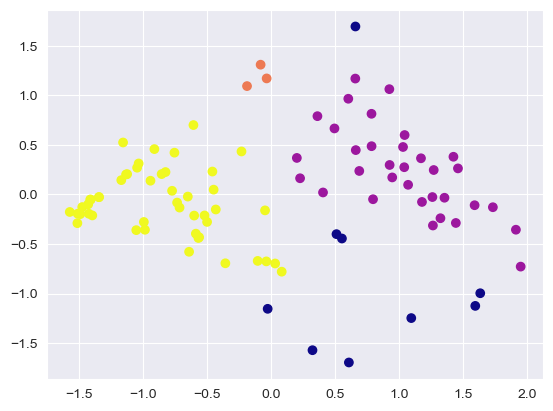

In [19]:
# Scatter plot of the data colored by cluster
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=sum_df['Cluster'], cmap='plasma')

In [ ]:
# Show the averages per cluster
clusters_df = sum_df.groupby('Cluster').mean()
clusters_df.round(2)

## Question 3 - Prediction


In [20]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [24]:
df = pd.read_csv('../data/pp_data.csv')

df['Date'] = pd.to_datetime(df['Date'])

In [25]:
greece_df = df[df['Entity'] == 'Greece']
greece_df.reset_index(inplace=True, drop=True)

# drop the columns that have single unique values
greece_df = greece_df.drop([col for col in greece_df if greece_df[col].nunique() == 1], axis=1)

greece_df

,Date,Daily tests,Cases,Deaths,Daily cases,Daily deaths,Tests
0,2020-02-26,28.0,1.0,0.0,0.0,0.0,28.0
1,2020-02-27,57.0,3.0,0.0,2.0,0.0,85.0
2,2020-02-28,28.0,4.0,0.0,1.0,0.0,113.0
3,2020-02-29,28.0,4.0,0.0,0.0,0.0,141.0
4,2020-03-01,85.0,7.0,0.0,3.0,0.0,226.0
...,...,...,...,...,...,...,...
364,2021-02-24,4215.0,184686.0,6371.0,1903.0,28.0,4995760.0
365,2021-02-25,50247.0,186469.0,6410.0,1783.0,39.0,5046007.0
366,2021-02-26,49075.0,188201.0,6439.0,1732.0,29.0,5095082.0
367,2021-02-27,46185.0,189831.0,6468.0,1630.0,29.0,5141267.0


In [26]:
date_to_predict = greece_df['Date'].max() + pd.Timedelta(days=3)
# Select the features (input)
X = np.arange(len(greece_df)).reshape(-1, 1)

In [27]:
y1 = greece_df["Daily cases"].values

svr1 = SVR(kernel='linear')

svr1.fit(X, y1)

SVR(kernel='linear')

In [28]:
y2 = greece_df["Daily tests"].values

svr2 = SVR(kernel='linear')

svr2.fit(X, y2)

SVR(kernel='linear')

In [30]:
predicted_daily_cases = svr1.predict([[len(greece_df) + 3]])[0]
predicted_daily_tests = svr2.predict([[len(greece_df) + 3]])[0]

predicted_daily_tests_ = round(predicted_daily_cases / predicted_daily_tests * 100, 2)
print(f"Predicted positivity rate ({date_to_predict}): {predicted_daily_tests_}%")

Predicted positivity rate (2021-03-03 00:00:00): 2.57%


In [ ]:
# train_cols = [col for col in greece_df.columns if greece_df[col].nunique() > 1]
# train_cols.remove('Daily positivity rate (%)')
# train_cols.remove('Date')
# ## Select the features (input)
# X = greece_df[train_cols].values
#
# # Select the target variable (output)
# y = greece_df["Daily positivity rate (%)"].values
# X[np.isinf(X)] = 1e10
# y[np.isinf(y)] = 1e10
# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.9, random_state=42)
#
# # Create an instance of the SVM regression model
# svm_model = SVR(kernel='rbf', C=1.0, epsilon=0.1)
#
# # Fit the model to the training data
# svm_model.fit(X_train, y_train)
#
# # Make predictions on the testing data
# svm_predictions = svm_model.predict(X_test)
#
# # Evaluate the model
# mse = mean_squared_error(y_test, svm_predictions)
# mae = mean_absolute_error(y_test, svm_predictions)
# r2 = r2_score(y_test, svm_predictions)
#
# # Print the evaluation metrics
# print("Mean Squared Error:", mse)
# print("Mean Absolute Error:", mae)
# print("R-squared Score:", r2)
#
# # Predict the positivity rate three days after the last available data
# last_data = greece_df.iloc[-1, :]
# last_features = last_data[train_cols].values
# predicted_positivity_rate = svm_model.predict([last_features])
# print("Predicted daily positivity rate (3 days later):", predicted_positivity_rate)